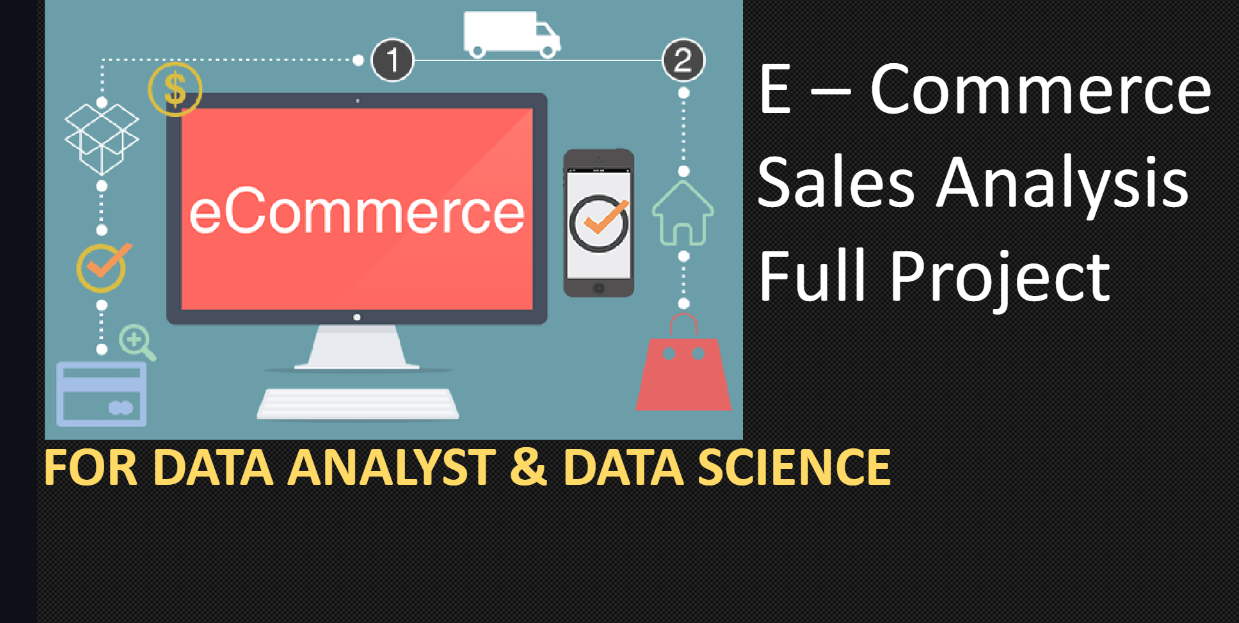

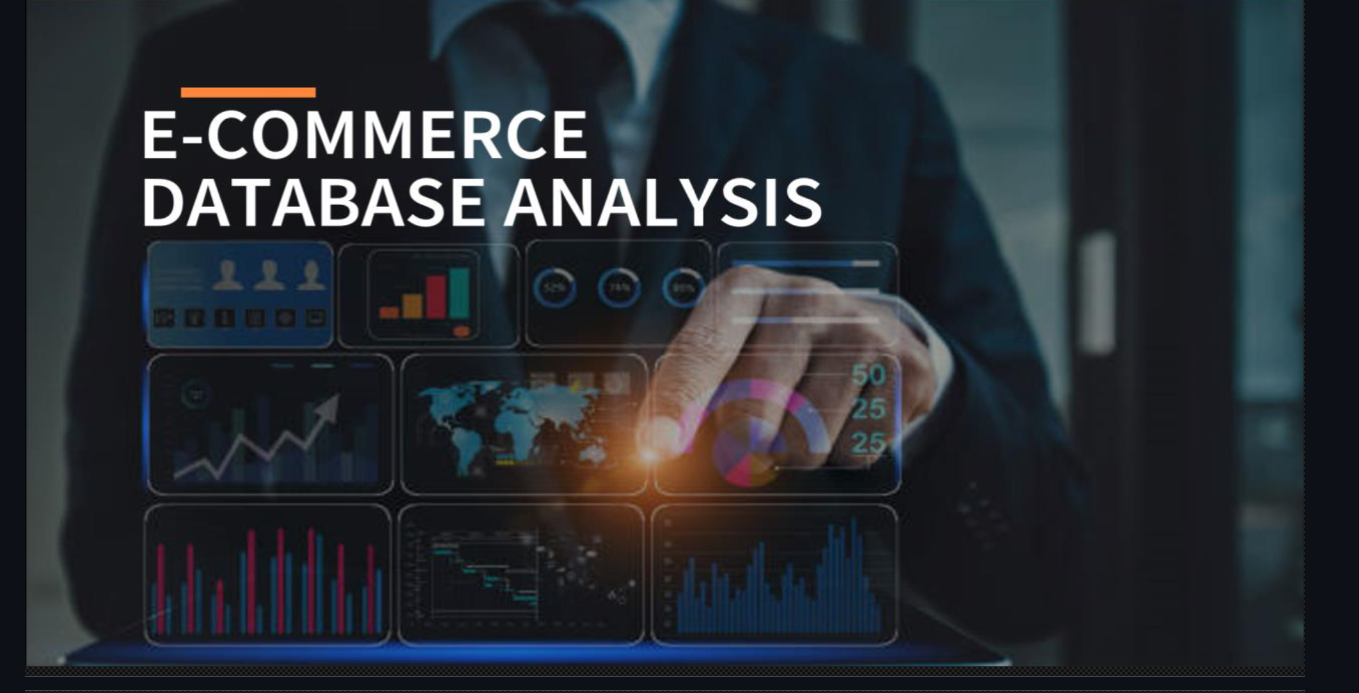

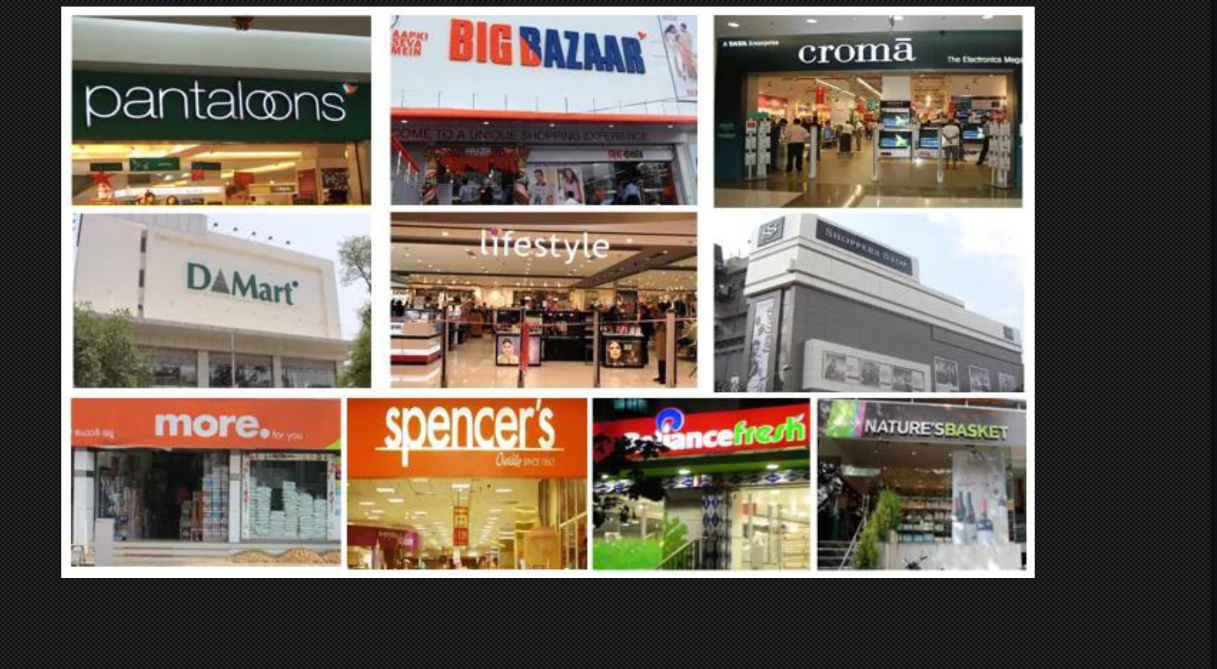

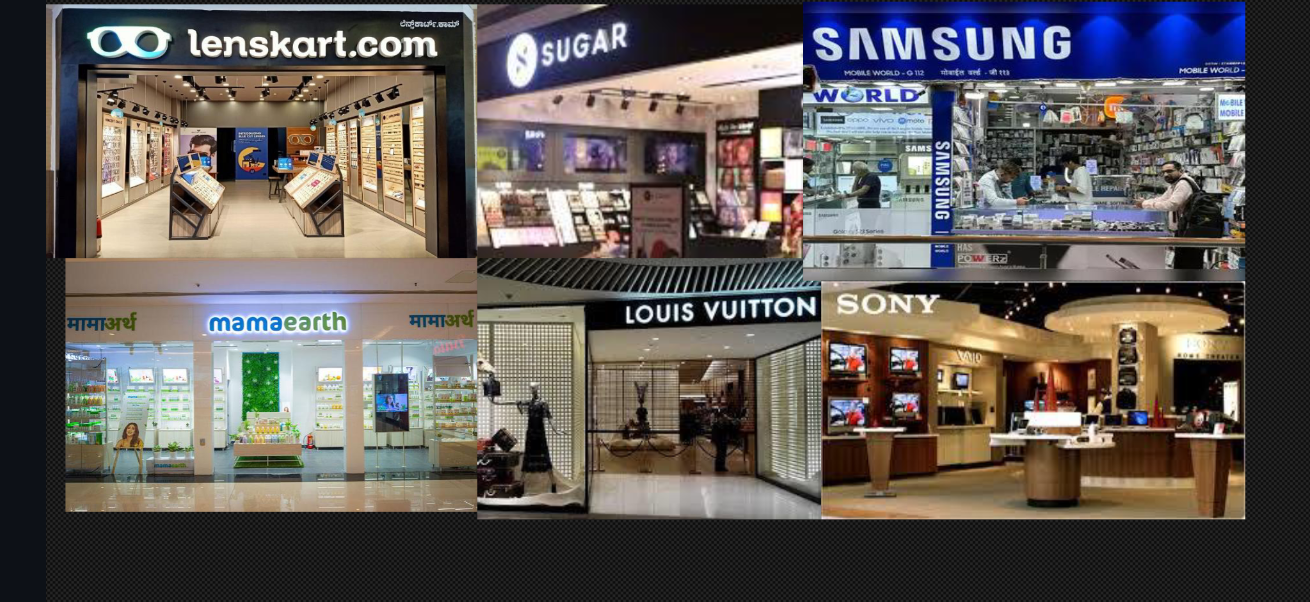

# Concept of this project


1. You need to calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales.

2. You need to analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.

3. The sales analysis needs to be done based on sub-categories

4. You need to analyze the monthly profit from sales and determine which month had the highest profit.

5. Analyze the profit by category and sub-category.

6. Analyze the sales and profit by customer segment

7. Analyze the sales to profit ratio



In [1]:
import pandas as pd #pandas (pd): Data manipulation ke liye use hota hai, jaise CSV file load karna aur process karna.

import plotly.express as px #plotly.express (px): Data visualization library jo easy aur quick plots banata hai.
import plotly.graph_objects as go #plotly.graph_objects (go): Advanced and customizable graphs banane ke liye|
import plotly.io as pio   #plotly.io (pio): Graph templates ko customize karne ke liye
import plotly.colors as colors 
pio.templates.default = "plotly_white"  #pio.templates.default = "plotly_white": Default theme white rakha gaya hai graphs ke liye

In [2]:
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1') 
#encoding='latin-1': Special characters ko properly read karne ke liye encoding use hui hai


In [3]:
data

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
...   ...         ...     ...              ...              ...          ...   
9989  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
9990  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
9991  ...       92627    West  TEC-PH-10003645       Technology       Phones   
9992  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
9993  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                        Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                 ...       ...       ...   
9989                             Ultra Door Pull Handle   25.2480         3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9991                              Aastra 57i VoIP phone  258.5760         2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20 

In [4]:
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

# Let’s start by looking at the descriptive statistics of the dataset

In [5]:
data.describe()

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting Date Columns

Order Date and Ship Date are in string data types so , convert it into date-time formate 

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 
#Date Conversion: Order Date aur Ship Date columns ko datetime format me convert kiya gaya hai for date-based analysis.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

# Adding New Date-Based Columns

In [10]:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

#Order Month: Order date se month extract karte hain.
#Order Year: Order date se year extract hota hai.
#Order Day of Week: Week ka day (0 for Monday, 6 for Sunday) extract kiya gaya hai.

In [11]:
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        Chairs   
2  Office Supplies        Labels   
3        Furniture        Tables   
4  Office Supplies       Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  Order Month  Order Year  Order Day of Week  
0     0.00   41.9136           11        2016                  1  
1     0.00  219.5820           11        2016                  1  
2     0.00    6.8714            6        2016                  6  
3     0.45 -383.0310           10        2015                  6  
4     0.20    2.5164           10        2015                  6  

[5 rows x 24 columns]

# 1. Monthly Sales Analysis

In [12]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
#Data Grouping:
#data.groupby('Order Month')['Sales'].sum() se har month ki total sales nikalte hain.
#.reset_index() data ko structured format me rakhta hai.

In [13]:
sales_by_month

Order Month        Sales
0             1   94924.8356
1             2   59751.2514
2             3  205005.4888
3             4  137762.1286
4             5  155028.8117
5             6  152718.6793
6             7  147238.0970
7             8  159044.0630
8             9  307649.9457
9            10  200322.9847
10           11  352461.0710
11           12  325293.5035

In [14]:
fig = px.line(sales_by_month, 
              x='Order Month', 
              y='Sales', 
              title='Monthly Sales Analysis')
fig.show()
#px.line: Monthly sales trend show karne ke liye line chart banaya gaya hai.
#fig.show(): Graph display karta hai.

# 2. Sales Analysis by Category

In [15]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
#groupby('Category'): Category-wise sales nikalte hain.

In [16]:
sales_by_category 

Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330

In [17]:
fig = px.pie(sales_by_category,
#Pie Chart:
#px.pie: Sales proportions ko pie chart me show karta hai.             
             values='Sales', 
             names='Category', 
             hole=0.5,          #hole=0.5: Donut-style chart banata hai.
             color_discrete_sequence=px.colors.qualitative.Pastel) #Pastel Colors: Chart me soft color palette use kiya gaya hai.

fig.update_traces(textposition='inside', textinfo='percent+label')  #  Pie chart ke labels ko andar show kiya h, percent aur label dono dikhao
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()

# 3. Sales Analysis by Sub-Category

In [18]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

In [19]:
sales_by_subcategory

Sub-Category        Sales
0   Accessories  167380.3180
1    Appliances  107532.1610
2           Art   27118.7920
3       Binders  203412.7330
4     Bookcases  114879.9963
5        Chairs  328449.1030
6       Copiers  149528.0300
7     Envelopes   16476.4020
8     Fasteners    3024.2800
9   Furnishings   91705.1640
10       Labels   12486.3120
11     Machines  189238.6310
12        Paper   78479.2060
13       Phones  330007.0540
14      Storage  223843.6080
15     Supplies   46673.5380
16       Tables  206965.5320

In [20]:
fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales Analysis by Sub-Category')
fig.show()

# 4. Monthly Profit Analysis

In [21]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()

In [22]:
profit_by_month 

Order Month      Profit
0             1   9134.4461
1             2  10294.6107
2             3  28594.6872
3             4  11587.4363
4             5  22411.3078
5             6  21285.7954
6             7  13832.6648
7             8  21776.9384
8             9  36857.4753
9            10  31784.0413
10           11  35468.4265
11           12  43369.1919

In [23]:
fig = px.line(profit_by_month ,
              x= 'Order Month',
              y= 'Profit',
              title= 'Monthly Profit Analysis'
              )
fig.show()

In [24]:
fig = px.bar(profit_by_month ,
              x= 'Order Month',
              y= 'Profit',
              title= 'Monthly Profit Analysis'
              )
fig.show()

# 5. Profit Analysis by Category

In [25]:
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        Chairs   
2  Office Supplies        Labels   
3        Furniture        Tables   
4  Office Supplies       Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  Order Month  Order Year  Order Day of Week  
0     0.00   41.9136           11        2016                  1  
1     0.00  219.5820           11        2016                  1  
2     0.00    6.8714            6        2016                  6  
3     0.45 -383.0310           10        2015                  6  
4     0.20    2.5164           10        2015                  6  

[5 rows x 24 columns]

In [26]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

In [27]:
profit_by_category

Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481

In [28]:
fig =px.bar(profit_by_category,
            x= 'Category',
            y= 'Profit',
            title= 'Profit Analysis by Category'
            
           )
fig.show()

In [29]:
fig = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category', title_font=dict(size=24))

fig.show()

# Profit by sub-Category

In [30]:
profit_by_Subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()

In [31]:
profit_by_Subcategory

Sub-Category      Profit
0   Accessories  41936.6357
1    Appliances  18138.0054
2           Art   6527.7870
3       Binders  30221.7633
4     Bookcases  -3472.5560
5        Chairs  26590.1663
6       Copiers  55617.8249
7     Envelopes   6964.1767
8     Fasteners    949.5182
9   Furnishings  13059.1436
10       Labels   5546.2540
11     Machines   3384.7569
12        Paper  34053.5693
13       Phones  44515.7306
14      Storage  21278.8264
15     Supplies  -1189.0995
16       Tables -17725.4811

In [32]:
fig =px.bar(profit_by_Subcategory,
            x= 'Sub-Category',
            y= 'Profit',
            title= 'Profit Analysis by Sub-Category'
            
           )
fig.show()

In [33]:
fig = px.pie(profit_by_Subcategory, 
             values='Profit', 
             names='Sub-Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Sub-Category', title_font=dict(size=24))

fig.show()

# 6. Sales and Profit Analysis by Customer Segment

In [34]:
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        Chairs   
2  Office Supplies        Labels   
3        Furniture        Tables   
4  Office Supplies       Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  Order Month  Order Year  Order Day of Week  
0     0.00   41.9136           11        2016                  1  
1     0.00  219.5820           11        2016                  1  
2     0.00    6.8714            6        2016                  6  
3     0.45 -383.0310           10        2015                  6  
4     0.20    2.5164           10        2015                  6  

[5 rows x 24 columns]

In [35]:
# Segment-wise Sales aur Profit ka total nikalna
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
# groupby('Segment'): Segment ke basis pe group banaya
# agg(): Sales aur Profit dono ka sum calculate kiya
# reset_index(): Grouping ke baad index ko reset kiya (DataFrame clean dikh sake)

In [36]:
sales_profit_by_segment

Segment         Sales       Profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785

In [37]:
color_palette = colors.qualitative.Pastel

#  Bar chart banane ke liye go.Figure() initialize kiya
fig = go.Figure()

# Pehla bar (Sales) add kiya - har Segment ke liye
fig.add_trace(go.Bar(
    x=sales_profit_by_segment['Segment'],  # X-axis pe Segment dikhana hai
    y=sales_profit_by_segment['Sales'],    # Y-axis pe Sales ka total dikhana hai
    name='Sales',                          # Legend me naam dikhane ke liye
    marker_color=color_palette[0]          # Bar ka color (Pastel se liya)
))

# Dusra bar (Profit) add kiya - same segment ke liye
fig.add_trace(go.Bar(
    x=sales_profit_by_segment['Segment'],  # X-axis pe wahi Segment
    y=sales_profit_by_segment['Profit'],   # Y-axis pe Profit ka total
    name='Profit',                         # Legend me naam
    marker_color=color_palette[1]          # Dusra pastel color use kiya
))

# Layout customize kiya - title aur axis labels set kiye
fig.update_layout(
    title='Sales and Profit Analysis by Customer Segment',  # Chart ka title
    xaxis_title='Customer Segment',                         # X-axis ka label
    yaxis_title='Amount'                                    # Y-axis ka label
)
fig.show()

# agg() ya aggregate function 


agg() function ka use Pandas me grouped data par calculations karne ke liye hota hai — jaise ki sum, mean, max, min, ya koi custom logic.

Yeh ek tarika hai ek ya ek se zyada columns ke liye ek ya ek se zyada operations ek sath apply karne ka.

Syntax : data.groupby('column_name').agg({'col1': 'sum', 'col2': 'mean'})

| Line                      | Explanation (Hinglish)                                 |
| ------------------------- | ------------------------------------------------------ |
| `data.groupby('Segment')` | Segment ke basis pe group bana diya                    |
| `.agg({...})`             | Har group ke liye Sales aur Profit pe aggregate lagaya |
| `'Sales': 'sum'`          | Sales values ka total nikala har group ke liye         |
| `'Profit': 'sum'`         | Profit values ka bhi total nikala                      |
| `.reset_index()`          | Grouping ke baad index thik kiya normal banane ke liye |


# 🛠️ Multiple Aggregations:
Agar aap ek hi column pe multiple operations chahte ho:

Syntex:

data.groupby('Segment').agg({

    'Sales': ['sum', 'mean'],
    
    'Profit': ['sum', 'min', 'max']
    
})


Yeh aapko ek multi-level column deta hai, jisme Sales ke liye sum & mean, aur Profit ke liye sum, min, max sab dikhte hain.



# fig.add_trace()

# analyse sales-to-profit ratio

In [38]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


In [39]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sales_profit_by_segment['Segment'],                        # X-axis: Segment
    y=sales_profit_by_segment['Sales_to_Profit_Ratio'],          # Y-axis: Sales/Profit Ratio
    name='Sales to Profit Ratio',
    marker_color=color_palette[2]                                # Bar ka color (Pastel)
))

#Chart layout customize karna
fig.update_layout(
    title='Sales to Profit Ratio by Customer Segment',           # Title
    xaxis_title='Customer Segment',                              # X-axis label
    yaxis_title='Sales to Profit Ratio',                         # Y-axis label
    yaxis=dict(tickformat=".2f")                                 # Ratio me 2 decimal points dikhana
)

fig.show()

In [40]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sales_profit_by_segment['Segment'],                        # X-axis: Segment names
    y=sales_profit_by_segment['Sales_to_Profit_Ratio'],          # Y-axis: Sales to Profit Ratio
    name='Sales to Profit Ratio',
    marker_color=color_palette[3],                               # Soft pastel color
    text=sales_profit_by_segment['Sales_to_Profit_Ratio'].round(2), # Value show kare bar ke upar
    textposition='outside'                                       # Text bar ke upar dikhaye
))

 #Chart ko customize karo
fig.update_layout(
    title='Sales to Profit Ratio by Segment',          # Chart ka title
    xaxis_title='Customer Segment',                       # X-axis label
    yaxis_title='Sales to Profit Ratio',                  # Y-axis label
    yaxis=dict(tickformat=".2f"),                         # 2 decimal point format
    template='plotly_white'                               # Clean background theme
)


fig.show()